In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from utility folder
import sys
sys.path.append("../src/utility/")
from utility import plot_settings
from utility import visualization
from utility import data_base as data

import scipy.stats as stats
from scipy.stats import norm

import pylab
import seaborn as sns

In [2]:
df_raw = data.read_csv('../data/cc_institution_grads.csv')
print(f'Raw data file: {len(df_raw)}')
df_drop_na = df_raw.dropna()
print(f"rows after droppped Nan: {len(df_drop_na)}")
df = df_drop_na.copy()

Raw data file: 1302102
rows after droppped Nan: 332061


In [3]:
df = df.drop('cohort', axis=1)
df = df.drop('grad_cohort', axis=1)
# 'unitid', 'year', 'gender', 'race', 'grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate'

In [4]:
set(df['race'])

{'A', 'Ai', 'B', 'H', 'W', 'X'}

## Summary of students (grad)

### Asian

In [5]:
temp = df.loc[df['race'] == 'A']
temp_gm = temp.loc[temp['gender'] == 'F']
cc = temp_gm['grad_100'].sum()
cc

227187.0

In [6]:
temp = df.loc[df['race'] == 'A']
temp_gm = temp.loc[temp['gender'] == 'M']
cc = temp_gm['grad_100'].sum()
cc

157591.0

In [7]:
temp = df.loc[df['race'] == 'A']
temp_gm = temp.loc[temp['gender'] == 'F']
cc = temp_gm['grad_150'].sum()
cc

337686.0

In [8]:
temp = df.loc[df['race'] == 'A']
temp_gm = temp.loc[temp['gender'] == 'M']
cc = temp_gm['grad_150'].sum()
cc

270047.0

### Black

In [9]:
temp = df.loc[df['race'] == 'B']
temp_gm = temp.loc[temp['gender'] == 'F']
cc = temp_gm['grad_100'].sum()
cc

225119.0

In [10]:
temp = df.loc[df['race'] == 'B']
temp_gm = temp.loc[temp['gender'] == 'M']
cc = temp_gm['grad_100'].sum()
cc

93650.0

In [11]:
temp = df.loc[df['race'] == 'B']
temp_gm = temp.loc[temp['gender'] == 'F']
cc = temp_gm['grad_150'].sum()
cc

413236.0

In [12]:
temp = df.loc[df['race'] == 'B']
temp_gm = temp.loc[temp['gender'] == 'M']
cc = temp_gm['grad_150'].sum()
cc

216835.0

### Hispanic

In [13]:
temp = df.loc[df['race'] == 'H']
temp_gm = temp.loc[temp['gender'] == 'F']
cc = temp_gm['grad_100'].sum()
cc

165225.0

In [14]:
temp = df.loc[df['race'] == 'H']
temp_gm = temp.loc[temp['gender'] == 'M']
cc = temp_gm['grad_100'].sum()
cc

91907.0

In [15]:
temp = df.loc[df['race'] == 'H']
temp_gm = temp.loc[temp['gender'] == 'F']
cc = temp_gm['grad_150'].sum()
cc

291320.0

In [16]:
temp = df.loc[df['race'] == 'H']
temp_gm = temp.loc[temp['gender'] == 'M']
cc = temp_gm['grad_150'].sum()
cc

185949.0

### White

In [17]:
temp_white = df.loc[df['race'] == 'W']
temp_white_gm = temp_white.loc[temp_white['gender'] == 'F']
cc = temp_white_gm['grad_100'].sum()
cc

2424576.0

In [18]:
temp_white = df.loc[df['race'] == 'W']
temp_white_gm = temp_white.loc[temp_white['gender'] == 'M']
cc = temp_white_gm['grad_100'].sum()
cc

1569027.0

In [19]:
temp_white = df.loc[df['race'] == 'W']
temp_white_gm = temp_white.loc[temp_white['gender'] == 'F']
cc = temp_white_gm['grad_150'].sum()
cc

3448307.0

In [20]:
temp_white = df.loc[df['race'] == 'W']
temp_white_gm = temp_white.loc[temp_white['gender'] == 'M']
cc = temp_white_gm['grad_150'].sum()
cc

2654861.0

### American Indian

In [21]:
temp_ai = df.loc[df['race'] == 'Ai']
temp_ai_gf = temp_ai.loc[temp_ai['gender'] == 'F']
cc = temp_ai_gf['grad_100'].sum()
cc

14318.0

In [22]:
temp_ai = df.loc[df['race'] == 'Ai']
temp_ai_gf = temp_ai.loc[temp_ai['gender'] == 'M']
cc = temp_ai_gf['grad_100'].sum()
cc

8014.0

In [23]:
temp_ai = df.loc[df['race'] == 'Ai']
temp_ai_gf = temp_ai.loc[temp_ai['gender'] == 'M']
cc = temp_ai_gf['grad_150'].sum()
cc

16872.0

In [24]:
temp_ai = df.loc[df['race'] == 'Ai']
temp_ai_gf = temp_ai.loc[temp_ai['gender'] == 'F']
cc = temp_ai_gf['grad_150'].sum()
cc

25079.0

### All

In [25]:
temp = df.loc[df['race'] == 'X']
temp_gm = temp.loc[temp['gender'] == 'F']
cc = temp_gm['grad_150'].sum()
cc

4801074.0

In [26]:
temp = df.loc[df['race'] == 'X']
temp_gm = temp.loc[temp['gender'] == 'M']
cc = temp_gm['grad_150'].sum()
cc

3593798.0

In [27]:
temp = df.loc[df['race'] == 'X']
temp_gm = temp.loc[temp['gender'] == 'F']
cc = temp_gm['grad_150'].sum()
cc

4801074.0

In [28]:
temp = df.loc[df['race'] == 'X']
temp_gm = temp.loc[temp['gender'] == 'M']
cc = temp_gm['grad_150'].sum()
cc

3593798.0

## Plots

In [29]:
all_grad_all_data = []

In [30]:
def get_df_sum_data(df, race, gender, grad):
    temp = df.loc[df['race'] == race]
    temp_gender = temp.loc[temp['gender'] == gender]
    cc = temp_gender[grad].sum()
    return cc

### Asians

In [31]:
asian = df.loc[df['race'] == 'A'].copy()
asian_grad = asian[['grad_100', 'grad_150']].copy()

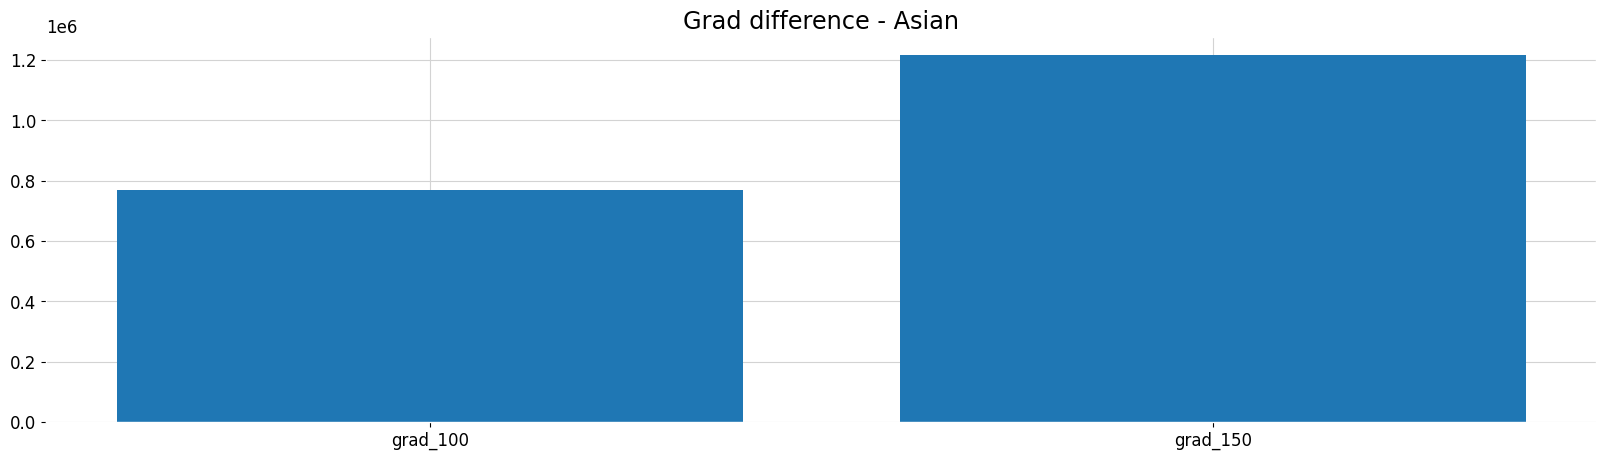

In [32]:
asian_grad = asian[['grad_100', 'grad_150']].copy()
a_sum = []
a_sum.append(asian_grad['grad_100'].sum())
a_sum.append(asian_grad['grad_150'].sum())

bars = ['grad_100', 'grad_150']
y_pos = np.arange(len(bars))
plt.bar(y_pos, a_sum)
plt.title('Grad difference - Asian')
plt.xticks(y_pos, bars)
plt.show()

In [33]:
a_grad_gender = []

a_f_100 = get_df_sum_data(df, 'A', 'F', 'grad_100')
a_m_100 = get_df_sum_data(df, 'A', 'M', 'grad_100')
a_f_150 = get_df_sum_data(df, 'A', 'F', 'grad_150')
a_m_150 = get_df_sum_data(df, 'A', 'M', 'grad_150')

a_grad_gender.append(a_f_100)
a_grad_gender.append(a_m_100)
a_grad_gender.append(a_f_150)
a_grad_gender.append(a_m_150)

all_grad_all_data.append(a_f_100)
all_grad_all_data.append(a_m_100)
all_grad_all_data.append(a_f_150)
all_grad_all_data.append(a_m_150)

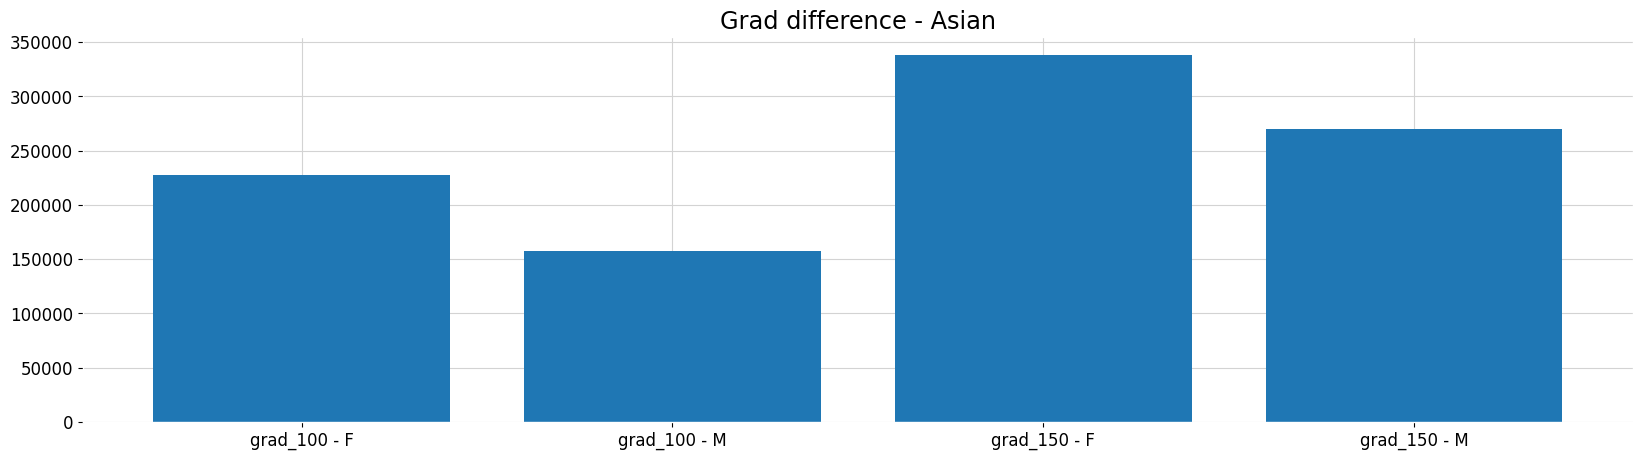

In [34]:
bars = ['grad_100 - F', 'grad_100 - M', 'grad_150 - F', 'grad_150 - M']
y_pos = np.arange(len(bars))
plt.bar(y_pos, a_grad_gender)
plt.title('Grad difference - Asian')
plt.xticks(y_pos, bars)
plt.show()

### American Indian

In [35]:
american_indian = df.loc[df['race'] == 'Ai'].copy()
ai_grad = american_indian[['grad_100', 'grad_150']].copy()

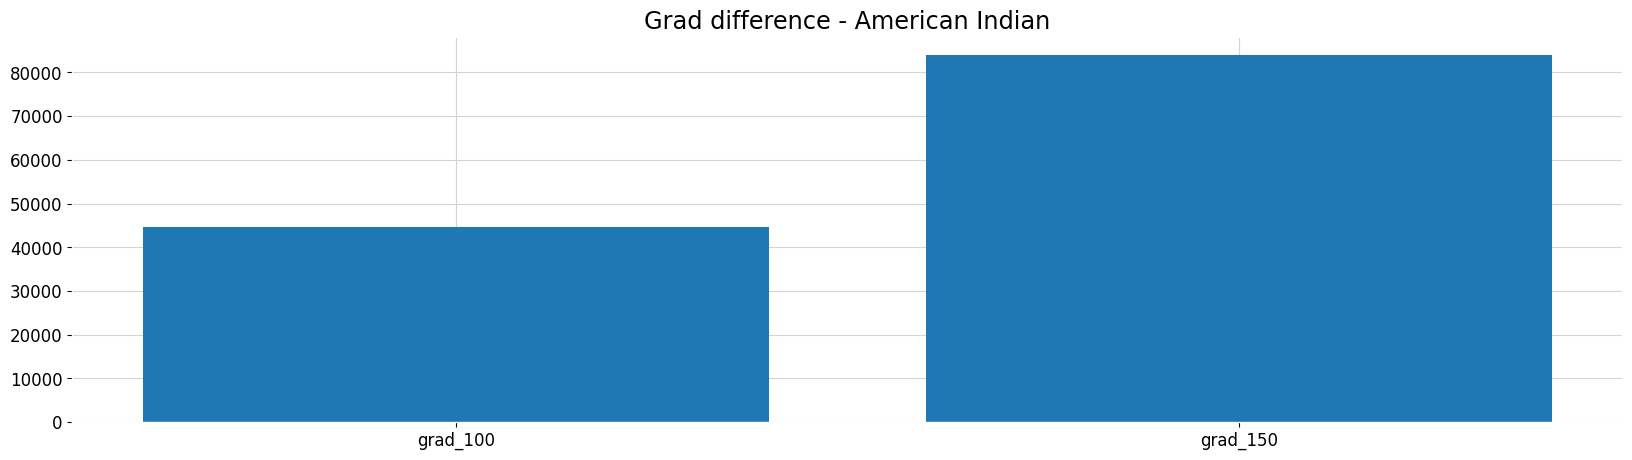

In [36]:
ai_sum = []
ai_sum.append(ai_grad['grad_100'].sum())
ai_sum.append(ai_grad['grad_150'].sum())

bars = ['grad_100', 'grad_150']
y_pos = np.arange(len(bars))
plt.bar(y_pos, ai_sum)
plt.title('Grad difference - American Indian')
plt.xticks(y_pos, bars)
plt.show()

In [37]:
ai_grad_gender = []

ai_f_100 = get_df_sum_data(df, 'Ai', 'F', 'grad_100')
ai_m_100 = get_df_sum_data(df, 'Ai', 'M', 'grad_100')
ai_f_150 = get_df_sum_data(df, 'Ai', 'F', 'grad_150')
ai_m_150 = get_df_sum_data(df, 'Ai', 'M', 'grad_150')

ai_grad_gender.append(ai_f_100)
ai_grad_gender.append(ai_m_100)
ai_grad_gender.append(ai_f_150)
ai_grad_gender.append(ai_m_150)

all_grad_all_data.append(ai_f_100)
all_grad_all_data.append(ai_m_100)
all_grad_all_data.append(ai_f_150)
all_grad_all_data.append(ai_m_150)

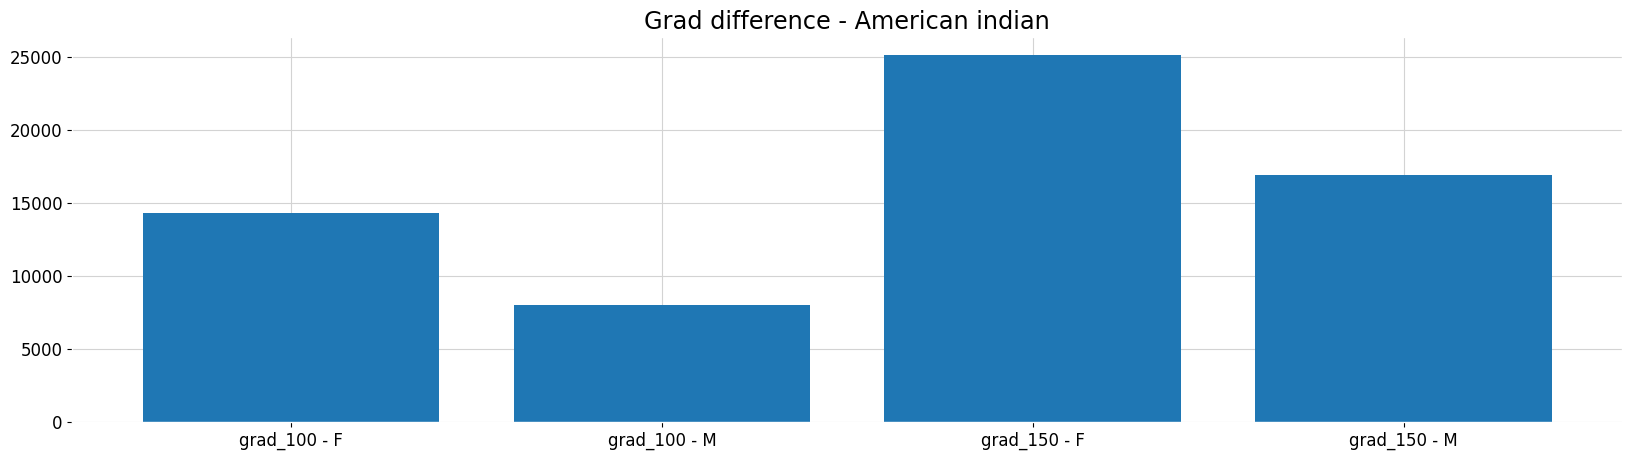

In [38]:
bars = ['grad_100 - F', 'grad_100 - M', 'grad_150 - F', 'grad_150 - M']
y_pos = np.arange(len(bars))
plt.bar(y_pos, ai_grad_gender)
plt.title('Grad difference - American indian')
plt.xticks(y_pos, bars)
plt.show()

### Black

In [39]:
black = df.loc[df['race'] == 'B'].copy()
black_grad = black[['grad_100', 'grad_150']].copy()

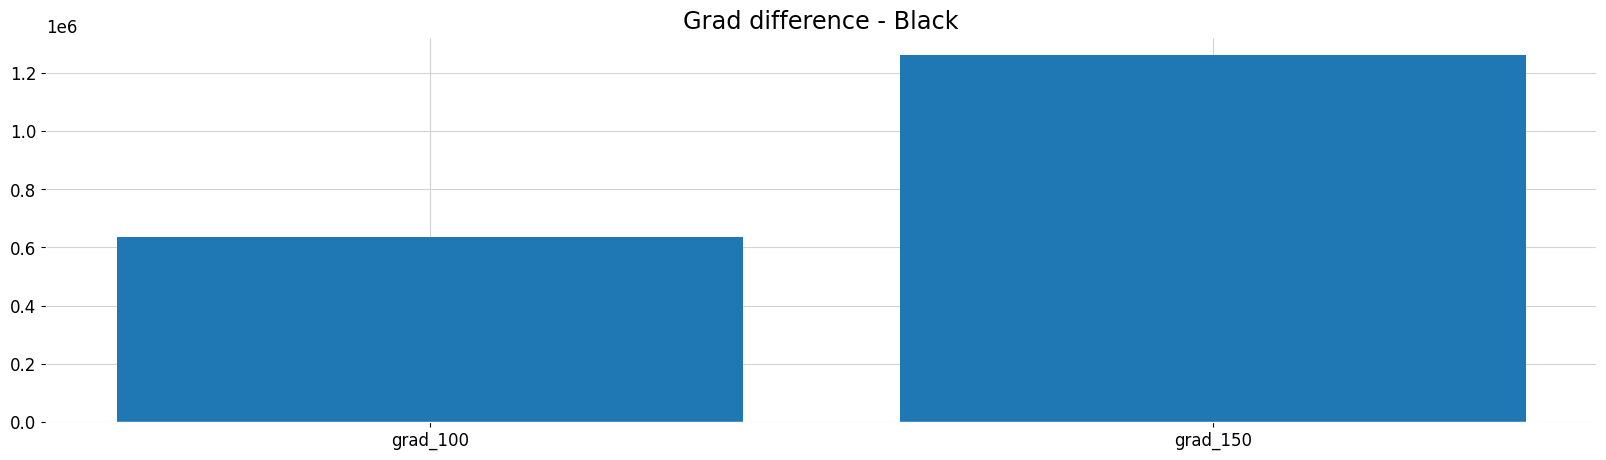

In [40]:
b_sum = []
b_sum.append(black_grad['grad_100'].sum())
b_sum.append(black_grad['grad_150'].sum())

bars = ['grad_100', 'grad_150']
y_pos = np.arange(len(bars))
plt.bar(y_pos, b_sum)
plt.title('Grad difference - Black')
plt.xticks(y_pos, bars)
plt.show()

In [41]:
b_grad_gender = []

b_f_100 = get_df_sum_data(df, 'B', 'F', 'grad_100')
b_m_100 = get_df_sum_data(df, 'B', 'M', 'grad_100')
b_f_150 = get_df_sum_data(df, 'B', 'F', 'grad_150')
b_m_150 = get_df_sum_data(df, 'B', 'M', 'grad_150')

b_grad_gender.append(b_f_100)
b_grad_gender.append(b_m_100)
b_grad_gender.append(b_f_150)
b_grad_gender.append(b_m_150)

all_grad_all_data.append(b_f_100)
all_grad_all_data.append(b_m_100)
all_grad_all_data.append(b_f_150)
all_grad_all_data.append(b_m_150)

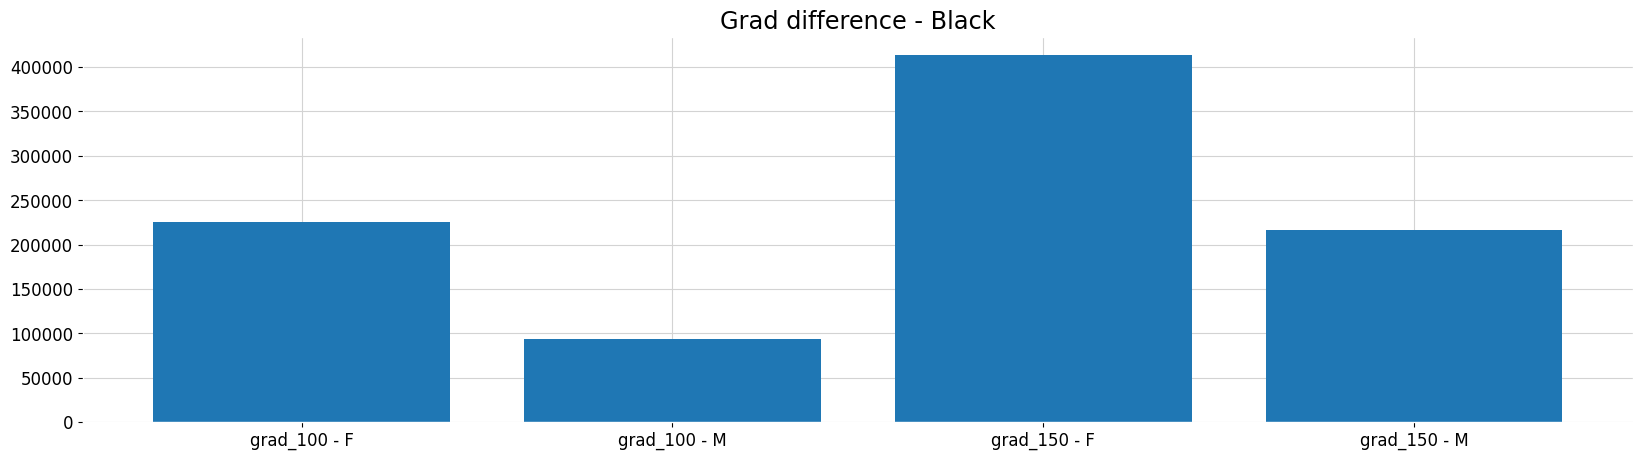

In [42]:
bars = ['grad_100 - F', 'grad_100 - M', 'grad_150 - F', 'grad_150 - M']
y_pos = np.arange(len(bars))
plt.bar(y_pos, b_grad_gender)
plt.title('Grad difference - Black')
plt.xticks(y_pos, bars)
plt.show()

### Hispanic

In [43]:
hispanic = df.loc[df['race'] == 'H'].copy()
hispanic_grad = hispanic[['grad_100', 'grad_150']].copy()

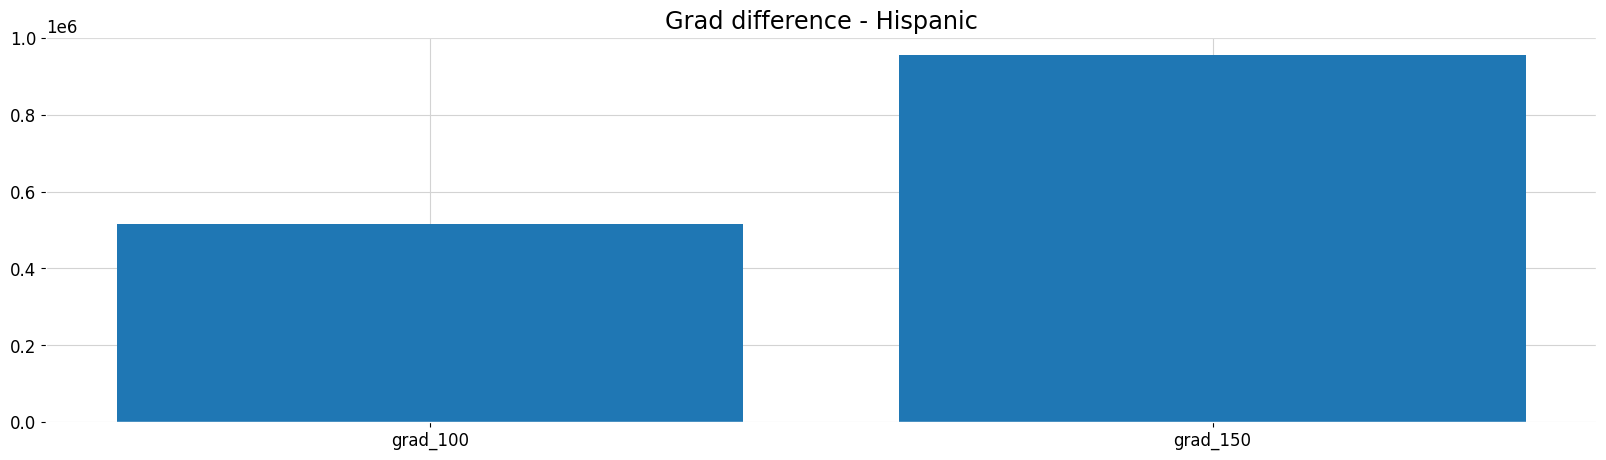

In [44]:
h_sum = []
h_sum.append(hispanic_grad['grad_100'].sum())
h_sum.append(hispanic_grad['grad_150'].sum())

bars = ['grad_100', 'grad_150']
y_pos = np.arange(len(bars))
plt.bar(y_pos, h_sum)
plt.title('Grad difference - Hispanic')
plt.xticks(y_pos, bars)
plt.show()

In [45]:
h_grad_gender = []

h_f_100 = get_df_sum_data(df, 'H', 'F', 'grad_100')
h_m_100 = get_df_sum_data(df, 'H', 'M', 'grad_100')
h_f_150 = get_df_sum_data(df, 'H', 'F', 'grad_150')
h_m_150 = get_df_sum_data(df, 'H', 'M', 'grad_150')

h_grad_gender.append(h_f_100)
h_grad_gender.append(h_m_100)
h_grad_gender.append(h_f_150)
h_grad_gender.append(h_m_150)

all_grad_all_data.append(h_f_100)
all_grad_all_data.append(h_m_100)
all_grad_all_data.append(h_f_150)
all_grad_all_data.append(h_m_150)

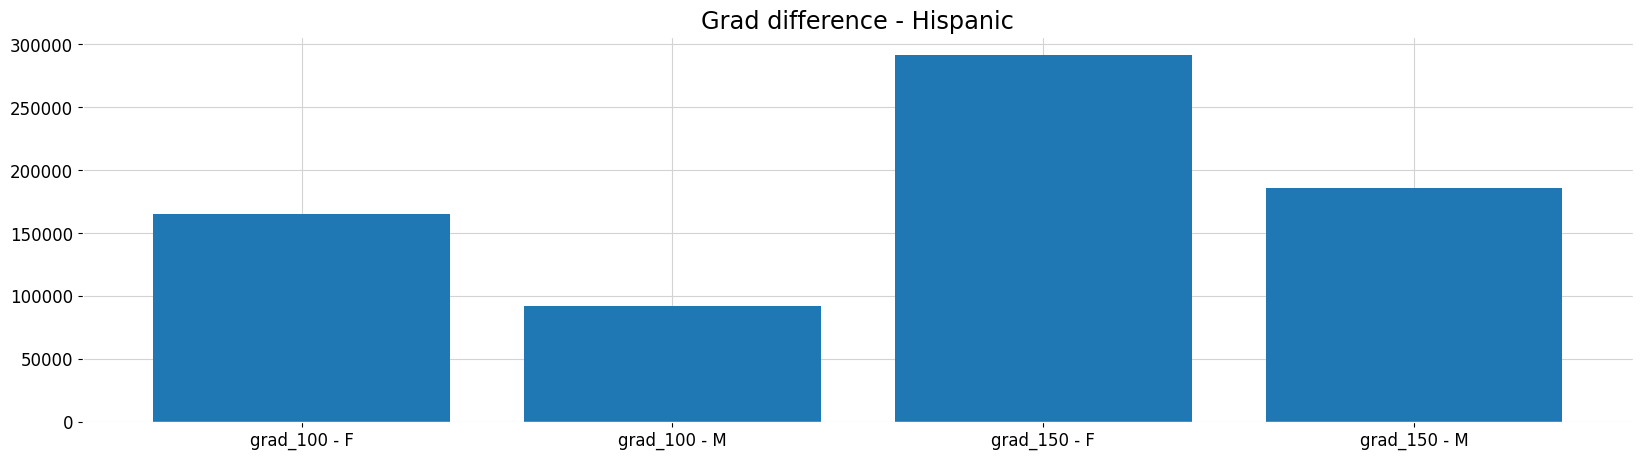

In [46]:
bars = ['grad_100 - F', 'grad_100 - M', 'grad_150 - F', 'grad_150 - M']
y_pos = np.arange(len(bars))
plt.bar(y_pos, h_grad_gender)
plt.title('Grad difference - Hispanic')
plt.xticks(y_pos, bars)
plt.show()

### White

In [47]:
white = df.loc[df['race'] == 'W'].copy()
white_grad = white[['grad_100', 'grad_150']].copy()

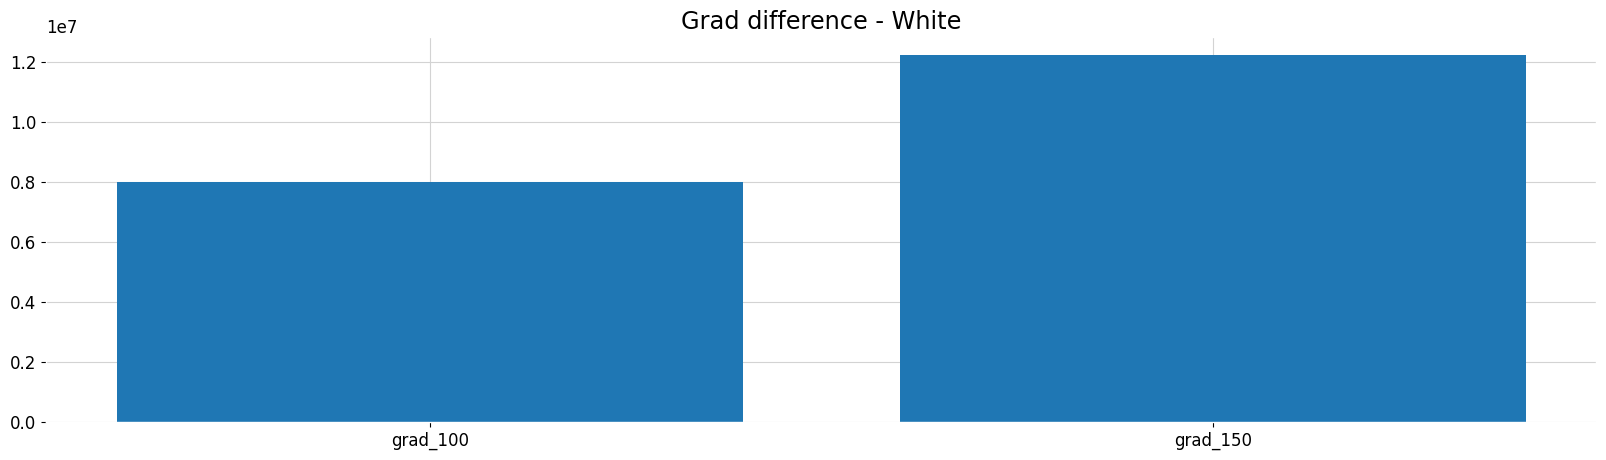

In [48]:
w_sum = []
w_sum.append(white_grad['grad_100'].sum())
w_sum.append(white_grad['grad_150'].sum())

bars = ['grad_100', 'grad_150']
y_pos = np.arange(len(bars))
plt.bar(y_pos, w_sum)
plt.title('Grad difference - White')
plt.xticks(y_pos, bars)
plt.show()

In [50]:
w_grad_gender = []

w_f_100 = get_df_sum_data(df, 'H', 'F', 'grad_100')
w_m_100 = get_df_sum_data(df, 'H', 'M', 'grad_100')
w_f_150 = get_df_sum_data(df, 'H', 'F', 'grad_150')
w_m_150 = get_df_sum_data(df, 'H', 'M', 'grad_150')

w_grad_gender.append(w_f_100)
w_grad_gender.append(w_m_100)
w_grad_gender.append(w_f_150)
w_grad_gender.append(w_m_150)

all_grad_all_data.append(w_f_100)
all_grad_all_data.append(w_m_100)
all_grad_all_data.append(w_f_150)
all_grad_all_data.append(w_m_150)

In [53]:
w_grad_gender

[165225.0, 91907.0, 291320.0, 185949.0]

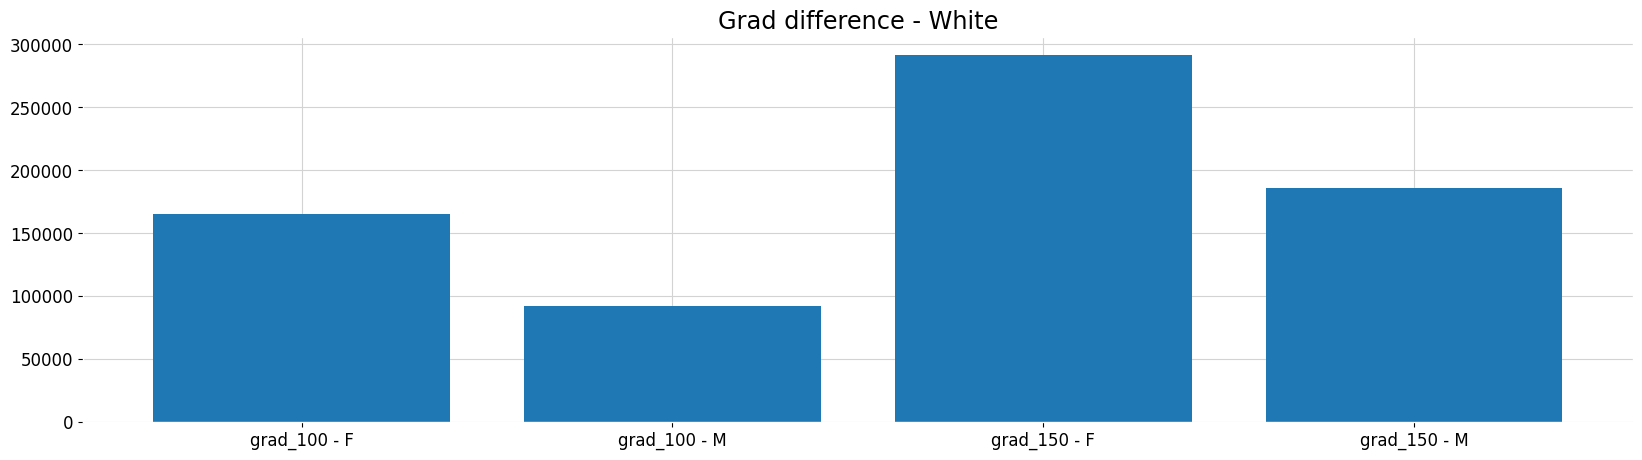

In [51]:
bars = ['grad_100 - F', 'grad_100 - M', 'grad_150 - F', 'grad_150 - M']
y_pos = np.arange(len(bars))
plt.bar(y_pos, w_grad_gender)
plt.title('Grad difference - White')
plt.xticks(y_pos, bars)
plt.show()

### All

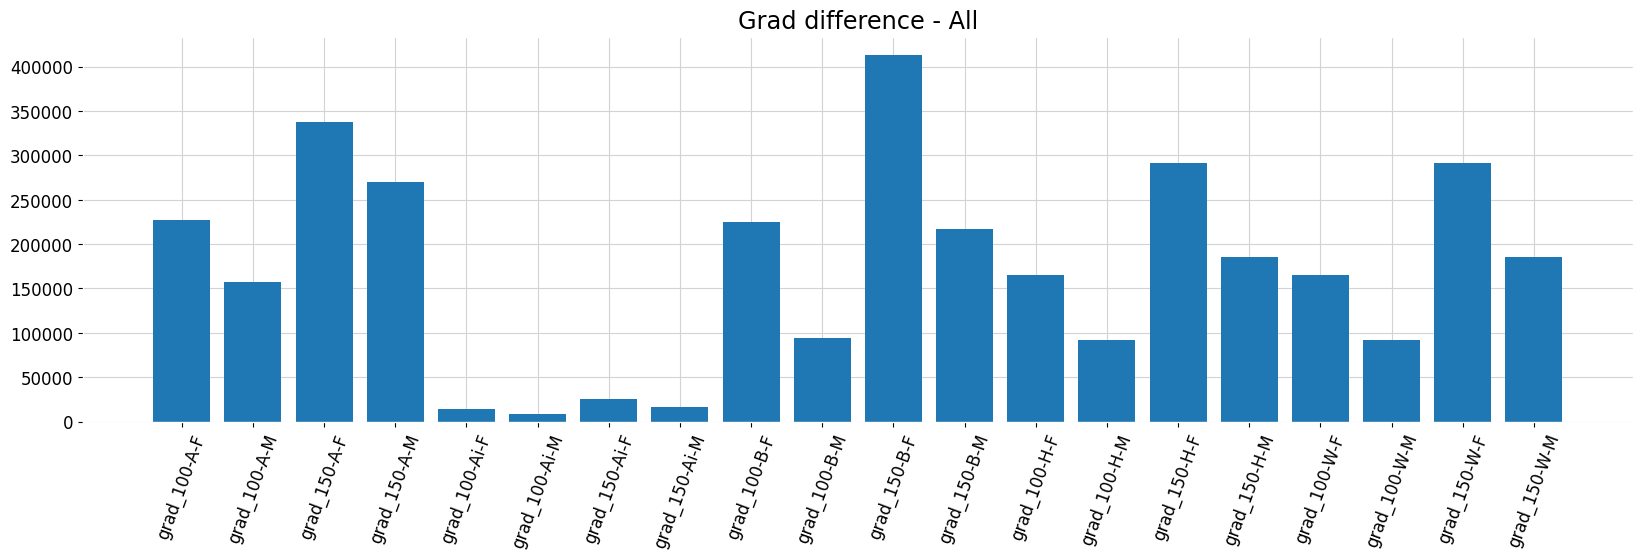

In [54]:
fig, ax = plt.subplots()

bars = ['grad_100-A-F', 'grad_100-A-M', 'grad_150-A-F', 'grad_150-A-M',
        'grad_100-Ai-F', 'grad_100-Ai-M', 'grad_150-Ai-F', 'grad_150-Ai-M',
        'grad_100-B-F', 'grad_100-B-M', 'grad_150-B-F', 'grad_150-B-M',
        'grad_100-H-F', 'grad_100-H-M', 'grad_150-H-F', 'grad_150-H-M',
        'grad_100-W-F', 'grad_100-W-M', 'grad_150-W-F', 'grad_150-W-M']


y_pos = np.arange(len(bars))
ax.bar(y_pos, all_grad_all_data)
ax.set_title('Grad difference - All')
ax.set_xticks(y_pos, bars, rotation=70)
plt.show()